In [13]:
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
from pandas_datareader import data
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import urllib.request
import time
import numpy as np
from datetime import datetime



In [2]:
stocks_start = datetime(2019, 4, 10)
stocks_end = datetime(2019, 4, 20)

In [3]:
def pullData4aStock(stock, startdate, enddate,method="yahoo"):
    import fix_yahoo_finance as yf
    from pandas_datareader import data as pdr
    from pandas_datareader import data
    import pandas as pd
    from alpha_vantage.timeseries import TimeSeries
    import quandl

    '''
    :param stock: one stock symple e.g "AAPL"
    :param startdate: e.g. datetime(2014, 1, 2)
    :param enddate: e.g. datetime(2017, 11, 10)
    :return: a data frame
    '''
    if method=="yahoo":
        pulledData=pdr.get_data_yahoo(stock, stocks_start, stocks_end)
    elif method=="quandl":
        pulledData=quandl.get("WIKI/"+stock, start_date=stocks_start, end_date=stocks_end, api_key='MqrLS-v2QJ8BJrs_R5sm')
    elif method=="alpha":
        ts=TimeSeries(key='ACLIMSOTBCT8K3GV', output_format='pandas')
        pulledData, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')

    return pulledData
    # return pdr.get_data_quandl(stock, stocks_start, stocks_end,api_key='MqrLS-v2QJ8BJrs_R5sm')

def pullData4StockList(stocksToPull, startdate, enddate,method="yahoo"):
    '''

    :param stock: e.g.  ["AAPL","CMG"]
    :param startdate: e.g. datetime(2014, 1, 2)
    :param enddate: e.g. datetime(2017, 11, 10)
    :return: a dictionary with key as stcok symbol
    '''
    Stocks_dict={x:pullData4aStock(x, startdate=startdate, enddate=enddate,method=method) for x in stocksToPull}

    return pd.concat(Stocks_dict.values(),keys=Stocks_dict.keys())

In [17]:
pulled=pullData4StockList(["CMG","AAPL"],startdate= stocks_start, enddate=stocks_end,method="yahoo")

In [5]:
pulled

High         Low        Open       Close    Volume  \
     Date                                                                   
CMG  2019-04-10  719.440002  711.000000  711.000000  718.849976    460500   
     2019-04-11  713.020020  705.179993  711.840027  707.530029    781800   
     2019-04-12  715.250000  707.500000  707.500000  712.440002    417200   
     2019-04-15  714.489990  708.349976  712.190002  712.270020    271800   
     2019-04-16  716.650024  704.760010  716.650024  706.479980    444300   
     2019-04-17  699.940002  686.500000  699.409973  688.210022    865900   
     2019-04-18  700.000000  687.000000  695.000000  700.000000    644000   
AAPL 2019-04-10  200.740005  198.179993  198.679993  200.619995  21695300   
     2019-04-11  201.000000  198.440002  200.850006  198.949997  20900800   
     2019-04-12  200.139999  196.210007  199.199997  198.869995  27760700   
     2019-04-15  199.850006  198.009995  198.580002  199.229996  17536600   
     2019-04-16  201.369995  198.559998  199.460007  199.250000  25696400   
     2019-04-17  203.380005  198.610001  199.539993  203.130005  28906800   
     2019-04-18  204.149994  202.520004  203.119995  203.860001  24195800   

                  Adj Close  
     Date                    
CMG  2019-04-10  718.849976  
     2019-04-11  707.530029  
     2019-04-12  712.440002  
     2019-04-15  712.270020  
     2019-04-16  706.479980  
     2019-04-17  688.210022  
     2019-04-18  700.000000  
AAPL 2019-04-10  200.619995  
     2019-04-11  198.949997  
     2019-04-12  198.869995  
     2019-04-15  199.229996  
     2019-04-16  199.250000  
     2019-04-17  203.130005  
     2019-04-18  203.860001

In [24]:
pulled.reset_index([0]).rename(columns={'level_0':'symbol'})

,symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2019-04-10,CMG,719.44,711.00,711.00,718.85,460500,718.85
2019-04-11,CMG,713.02,705.18,711.84,707.53,781800,707.53
2019-04-12,CMG,715.25,707.50,707.50,712.44,417200,712.44
2019-04-15,CMG,714.49,708.35,712.19,712.27,271800,712.27
2019-04-16,CMG,716.65,704.76,716.65,706.48,444300,706.48
2019-04-17,CMG,699.94,686.50,699.41,688.21,865900,688.21
...,...,...,...,...,...,...,...
2019-04-11,AAPL,201.00,198.44,200.85,198.95,20900800,198.95
2019-04-12,AAPL,200.14,196.21,199.20,198.87,27760700,198.87


In [19]:
pulled.loc['CMG','2019-04-15']

High            714.49
Low             708.35
Open            712.19
Close           712.27
Volume       271800.00
Adj Close       712.27
Name: (CMG, 2019-04-15 00:00:00), dtype: float64

In [14]:
pulled.unstack(0)

High             Low            Open           Close          \
               CMG    AAPL     CMG    AAPL     CMG    AAPL     CMG    AAPL   
Date                                                                         
2019-04-10  719.44  200.74  711.00  198.18  711.00  198.68  718.85  200.62   
2019-04-11  713.02  201.00  705.18  198.44  711.84  200.85  707.53  198.95   
2019-04-12  715.25  200.14  707.50  196.21  707.50  199.20  712.44  198.87   
2019-04-15  714.49  199.85  708.35  198.01  712.19  198.58  712.27  199.23   
2019-04-16  716.65  201.37  704.76  198.56  716.65  199.46  706.48  199.25   
2019-04-17  699.94  203.38  686.50  198.61  699.41  199.54  688.21  203.13   
2019-04-18  700.00  204.15  687.00  202.52  695.00  203.12  700.00  203.86   

            Volume           Adj Close          
               CMG      AAPL       CMG    AAPL  
Date                                            
2019-04-10  460500  21695300    718.85  200.62  
2019-04-11  781800  20900800    707.53  198.95  
2019-04-12  417200  27760700    712.44  198.87  
2019-04-15  271800  17536600    712.27  199.23  
2019-04-16  444300  25696400    706.48  199.25  
2019-04-17  865900  28906800    688.21  203.13  
2019-04-18  644000  24195800    700.00  203.86

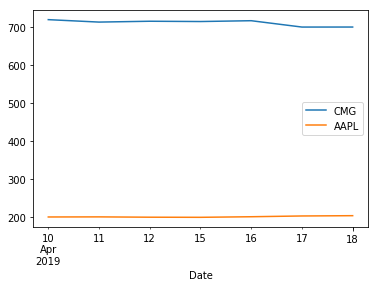

In [8]:
pulled.unstack(0)['High'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB12C204E0>,
      dtype=object)

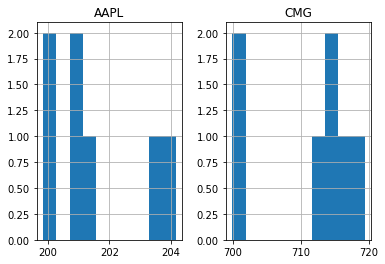

In [15]:
pulled.unstack(0)['High'].hist()